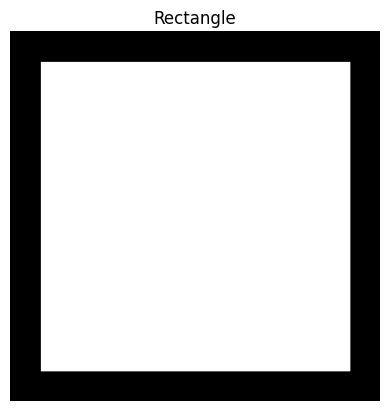

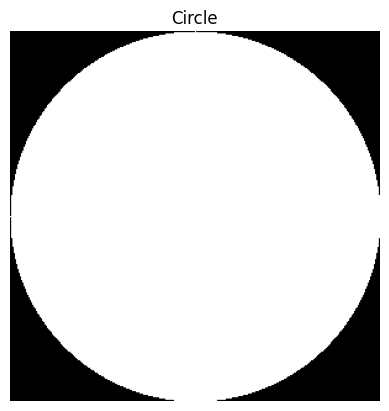

: 

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Hình vuông
rectangle = np.zeros((300, 300), dtype=np.uint8)
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

# Hình tròn
circle = np.zeros((300, 300), dtype=np.uint8)
cv2.circle(circle, (150, 150), 150, 255, -1)

plt.figure(); plt.imshow(rectangle, cmap='gray'); plt.title('Rectangle'); plt.axis('off')
plt.figure(); plt.imshow(circle, cmap='gray'); plt.title('Circle'); plt.axis('off')
plt.show()


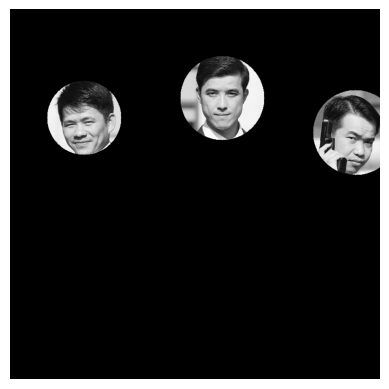

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# đọc ảnh
img = cv2.imread("lab3_img1.png")
H, W = img.shape[:2]

# tạo mask đen
mask = np.zeros((H, W), dtype="uint8")

cv2.circle(mask, (150, 220), 75, 255, -1)   # mặt trái
cv2.circle(mask, (430, 180), 85, 255, -1)   # mặt giữa
cv2.circle(mask, (700, 250), 86, 255, -1)   # mặt phải
# áp mask
masked = cv2.bitwise_and(img, img, mask=mask)

# hiển thị
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


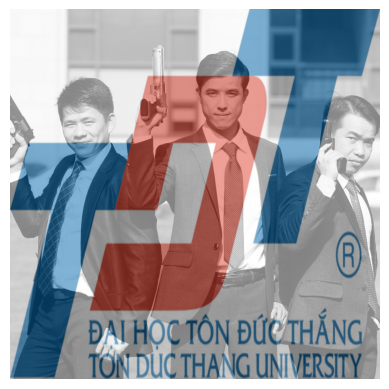

True

In [36]:
import cv2
import matplotlib.pyplot as plt

# đọc ảnh
img1 = cv2.imread("lab3_img1.png")      # ảnh 3 người
img2 = cv2.imread("lab3_img2.png")       # logo TDT

# resize logo bằng kích thước ảnh gốc
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# alpha blending (50% - 50%)
blended = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

# hiển thị
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# lưu file
cv2.imwrite("image_02_01.png", blended)


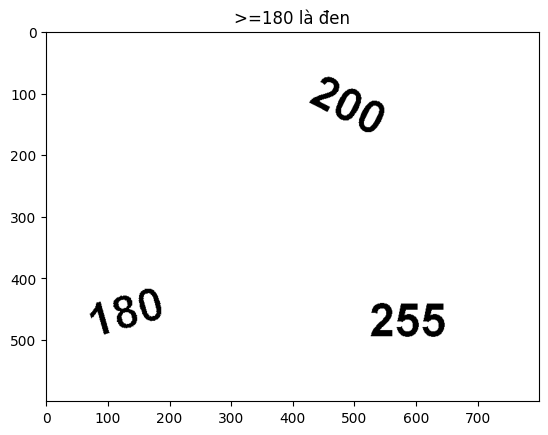

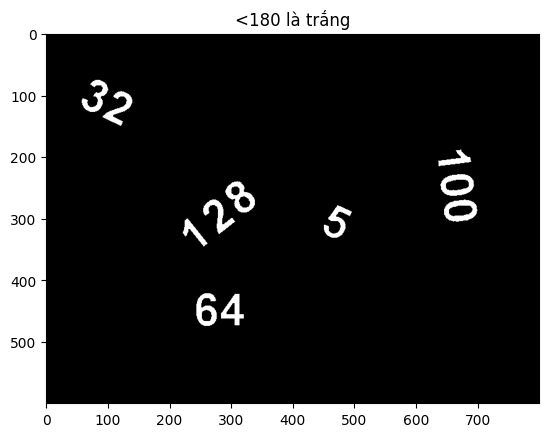

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


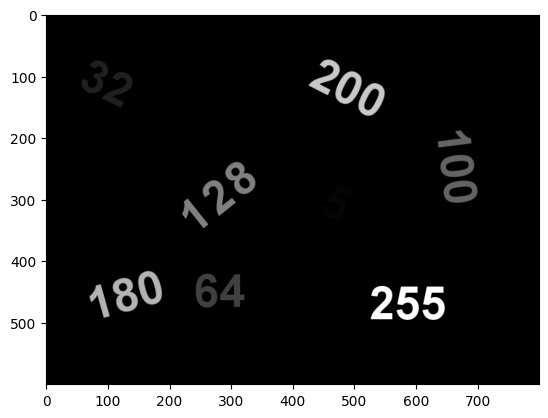

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# đọc ảnh gốc
img = cv2.imread("threshold.png", cv2.IMREAD_GRAYSCALE)
H, W = img.shape

# Ảnh 1: >=180 đen, <180 trắng
bin1 = np.zeros((H, W), dtype=np.uint8)
for y in range(H):
    for x in range(W):
        if img[y, x] >= 180:
            bin1[y, x] = 0   # đen
        else:
            bin1[y, x] = 255 # trắng

# PP1
# Ảnh 2: <180 trắng, còn lại đen
# bin2 = np.zeros((H, W), dtype=np.uint8)
# for y in range( H):
#     for x in range( W):
#         if img[y, x] < 180 and img[y, x] != 0:
#             bin2[y, x] = 255 # trắng
#         else:
#             bin2[y, x] = 0   # đen

# PP2
bin2 = np.zeros((H, W), dtype=np.uint8)
for y in range(H):
    for x in range(W):
        if img[y, x] >= 180:
            bin1[y, x] = 0   # đen
        if img[y, x] < 180 and img[y, x] != 0:
            bin2[y, x] = 255 # trắng

# Xoa vieng nho bi nhieu
kernel = np.ones((3,3), np.uint8)
bin2 = cv2.erode(bin2, kernel, iterations=1)

# hiển thị
plt.imshow(bin1, cmap="gray"); plt.title(">=180 là đen")
plt.show()
plt.imshow(bin2, cmap="gray"); plt.title("<180 là trắng")
plt.show()

plt.imshow( img, cmap="gray" )

print(img)


In [15]:
import cv2

# Mở video gốc
cap = cv2.VideoCapture("vidieo.mp4")

# Lấy thông số video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Ghi video mới
out = cv2.VideoWriter("vidieo_output.mp4", fourcc, fps, (width, height))

# Đọc ảnh logo (PNG có alpha càng tốt)
logo = cv2.imread("lab3_img2.png", cv2.IMREAD_UNCHANGED)

# Resize logo nhỏ hơn
logo = cv2.resize(logo, (400, 400))

# Nếu logo có alpha channel
if logo.shape[2] == 4:
    alpha_logo = logo[:, :, 3] / 255.0
    alpha_frame = 1.0 - alpha_logo
else:
    alpha_logo = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Vị trí chèn logo (góc phải dưới)
    y1 = height - logo.shape[0]
    y2 = height
    x1 = width - logo.shape[1]
    x2 = width

    roi = frame[y1:y2, x1:x2]

    if alpha_logo is not None:
        for c in range(0, 3):
            roi[:, :, c] = (alpha_logo * logo[:, :, c] +
                            alpha_frame * roi[:, :, c])
    else:
        roi[:] = logo

    frame[y1:y2, x1:x2] = roi

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()
